<a href="https://colab.research.google.com/github/MrLuksR/Clasificacion---Calidad-de-Vinos/blob/main/Clasificacion_Calidad_del_Vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
X = df[['citric acid', 'sulphates', 'alcohol']]
Y = df[['quality']]

sc = StandardScaler()
XScaled = sc.fit_transform(X)

kn = KNeighborsClassifier(n_neighbors = 10)
kn.fit(XScaled, Y)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [54]:
input = [[0, 0, 0]]
inputScaler = sc.transform(input)
output = kn.predict(inputScaler)

print("El resultado para esa entrada es:", output[0], "de 10")

El resultado para esa entrada es: 4 de 10


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Axes: >

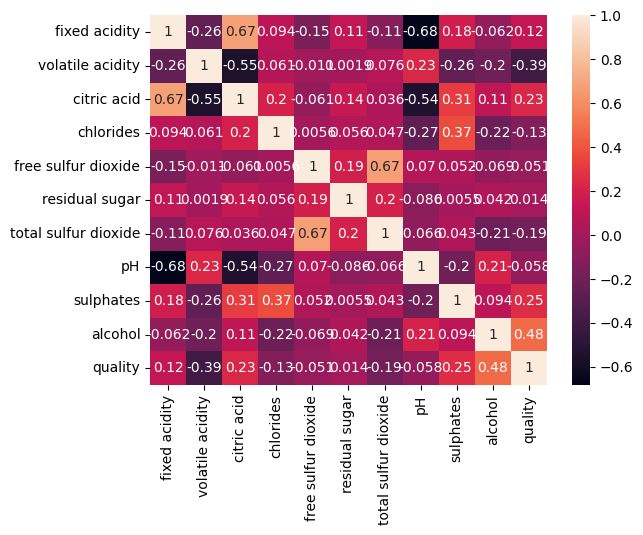

In [43]:
import matplotlib.pyplot as plt
import seaborn as sb

cols=['fixed acidity','volatile acidity','citric acid','chlorides','free sulfur dioxide','residual sugar','total sulfur dioxide','pH','sulphates','alcohol','quality']
sb.heatmap(df[cols].corr(), annot=True)

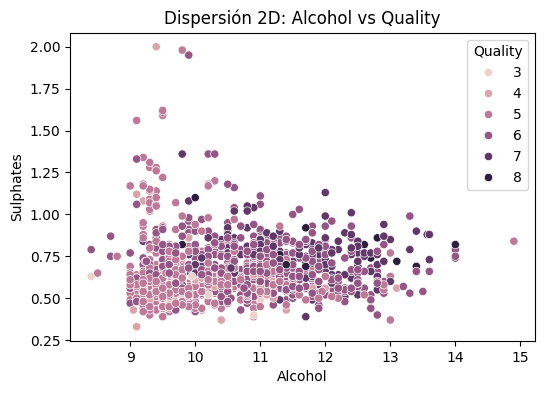

In [52]:
plt.figure(figsize=(6,4))
sb.scatterplot(
    data=df,
    x="alcohol",
    y="sulphates",
    hue="quality"
 )
plt.title("Dispersión 2D: Alcohol vs Quality")
plt.xlabel("Alcohol")
plt.ylabel("Sulphates")
plt.legend(title="Quality")
plt.show()